# Outlier Detection using (LOD and IsolationForest)

# Imports all the necessary packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing data sets

In [4]:
df = pd.read_csv('datafiles/creditcardfraud/creditcard.csv')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Check the correlations between features

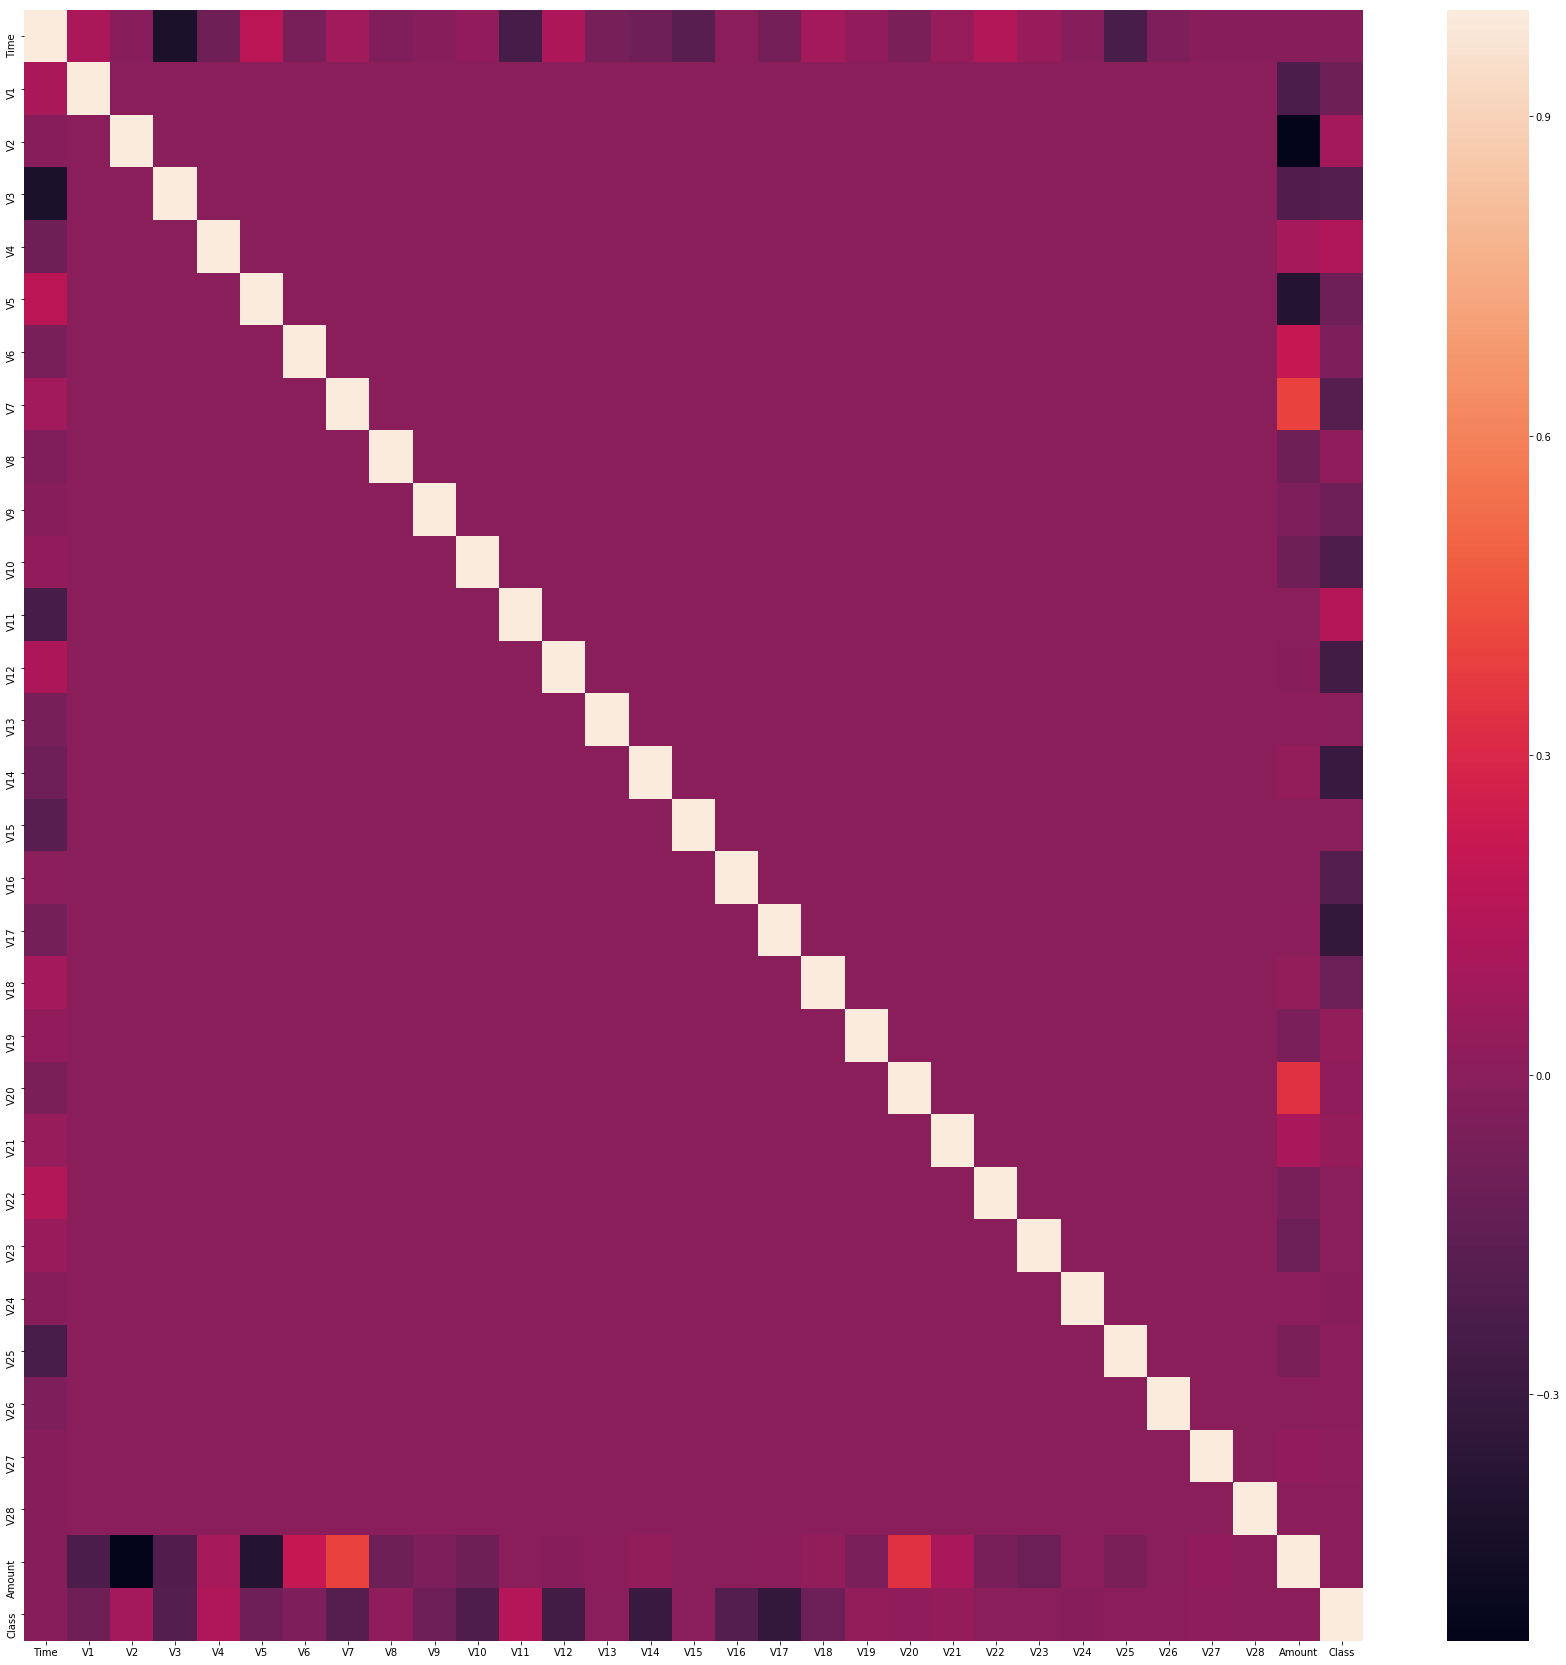

In [17]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=False)

# Check for missing values

In [6]:
df.isnull().mean()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# As there is lots of data, training and working with data set will take lots of time 
# so take some fraction sample 

In [9]:
data = df.sample(frac=0.1)

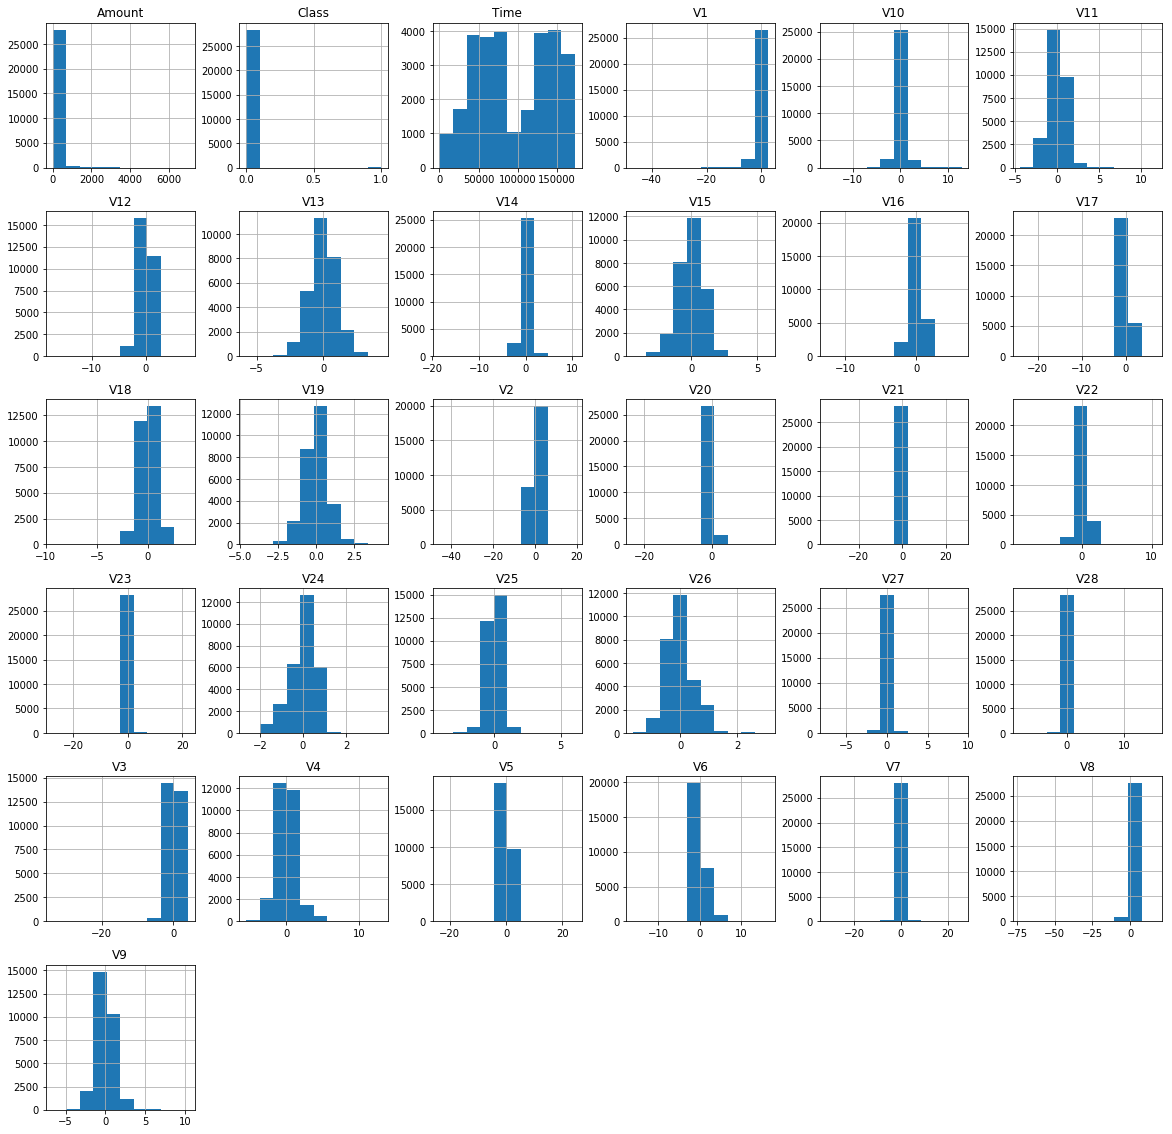

In [10]:
data.hist(figsize=(20,20))
plt.show()

# Check for fraud (1) and valid(0)

In [12]:
pd.pivot_table(data=data,columns='Class', values='Amount',aggfunc='count')

Class,0,1
Amount,28417,64


# Divide dataset into dependent and independent variables

In [13]:
columns = data.loc[: , df.columns != 'Class']

x =columns
y = data['Class']

# Determine outlier fraction

In [25]:
Fraud = data.loc[df['Class'] == 1]
Valid = data.loc[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))

# Now lets start outlier detection

In [1]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# Outlier detection using LocalOutlierFactor

In [35]:
local =LocalOutlierFactor(contamination=outlier_fraction)

In [62]:
y_pred = local.fit_predict(x)

In [63]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = -1

In [81]:
accuracy_score(y,y_pred)

0.9965239984551104

In [82]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28417
           1       0.23      0.23      0.23        64

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.61      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481



In [70]:
## Outlier detection using IsolationForest

In [71]:
isolate = IsolationForest(contamination=outlier_fraction)

In [72]:
isolate.fit(x)

/home/ritesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False,
        contamination=0.0022521729950381814, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=None,
        random_state=None, verbose=0)

In [75]:
y_pred = isolate.predict(x)

In [78]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [79]:
accuracy_score(y,y_pred)

0.9965239984551104

In [80]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28417
           1       0.23      0.23      0.23        64

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.61      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481

